# One Sample Wilcoxon Test

As noted prior, the differences must be normally distributed to run a paired T Test. 
If they are not normally distributed, first confirm the data is accurate. If so, then 
determine if the point(s) causing the non-normal behavior (where there was a special cause event) that has been resolved and is not expected to reoccur. If so, remove it and check again for normality. Otherwise, run a 1 Sample Wilcoxon, which is a nonparametric alternative. (If the 1 Sample Wilcoxon test cannot be run, then consider a data transformation as described for the Two Sample T Test section.)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stats_tests import wilcoxon_test
from stats_plots import hist
plt.style.use('classic')

In [3]:
# Replace with your actual Excel path/sheet
xls = pd.ExcelFile("Six Sigma_Case Study.xlsx")
df = (
    pd.read_excel(
        xls,
        sheet_name="Paired T Test",
        usecols = ["Sample", "Device A",
                   "Device B",
                   "Differences"]
    )
    .dropna(how="all")  # drop rows where all columns are NaN
)
# Strip whitespace from column names
df.columns = df.columns.str.strip()
df.head()

,Sample,Device A,Device B,Differences
0,1,0.030837,0.033921,0.003084
1,2,0.028890,0.031779,0.002889
2,3,0.030107,0.033118,0.003011
3,4,0.029378,0.032316,0.002938
4,5,0.029524,0.032477,0.002952


In [4]:
result = wilcoxon_test(df["Differences"])


    N    Median  Wilcoxon Statistic   p-value Null Hypothesis  \
0  10  0.003029                 0.0  0.001953      median = 0   

  Alternative Hypothesis  
0             median ≠ 0  


## Results
 - P-value is < alpha = 0.05.
 - Conclude the differences in the paired values are not 0.
 - Therefore, conclude there is a difference.


## Confirm assumption os symmetry is met

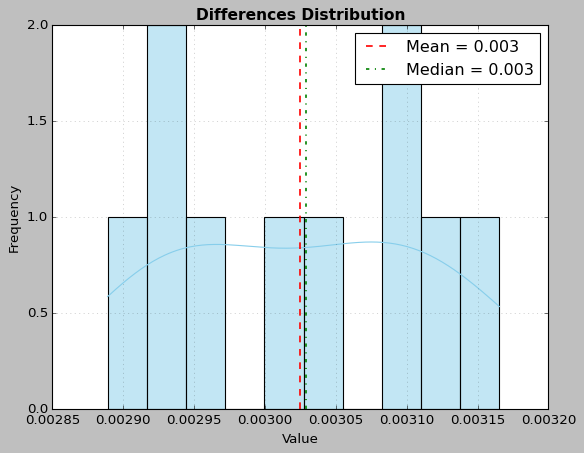

In [5]:
hist(df["Differences"], title="Differences Distribution")

- A 1 sample Wilcoxon test requires that the differences be symmetrically distributed.
- Note the distribution is symmetrical (e.g., no apparent left or right shift), so the assumption is met, and the results of the 1 sample Wilcoxon test can be accepted.